In [ ]:
# Import Your Libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Part 1

### Your Histogram Equalization Function

In [ ]:
BRIGHTNESS_LAYERS = 256

def hist_equ(image):
    '''
    input:
    image (ndarray): input image
    output:
    output_image (ndarray): enhanced image
    '''
    
    ############
    # Your code
    # Start
    pdf = np.zeros(BRIGHTNESS_LAYERS)

    for pixel in np.nditer(image) :
      pdf[np.round_(pixel)] += 1

    cdf = np.zeros(BRIGHTNESS_LAYERS)
    cdf[0] = pdf[0]
    for pixel_iterator in range(1,BRIGHTNESS_LAYERS) :
      cdf[pixel_iterator] = cdf[pixel_iterator-1] + pdf [pixel_iterator]

    height , width = image.shape
    n = height * width
    tr = (cdf / n) * (BRIGHTNESS_LAYERS - 1)

    output_image = np.zeros((1,height * width))

    output_index = 0 
    for pixel in np.nditer(image) :
      output_image[0,output_index]= tr[np.round_(pixel)]
      output_index += 1 

    output_image = output_image.reshape(image.shape)
    assert image.shape == output_image.shape
    # End
    
    return output_image

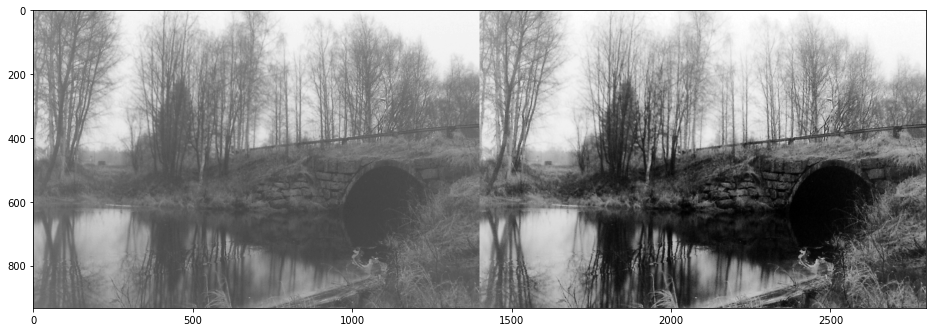

In [ ]:
img = cv2.imread('/content/River.jpg', 0)

### YOUR CODE ###
# START
equ = hist_equ(img)
# END

res = np.hstack((img, equ)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

### Histogram Equalization OpenCV Library

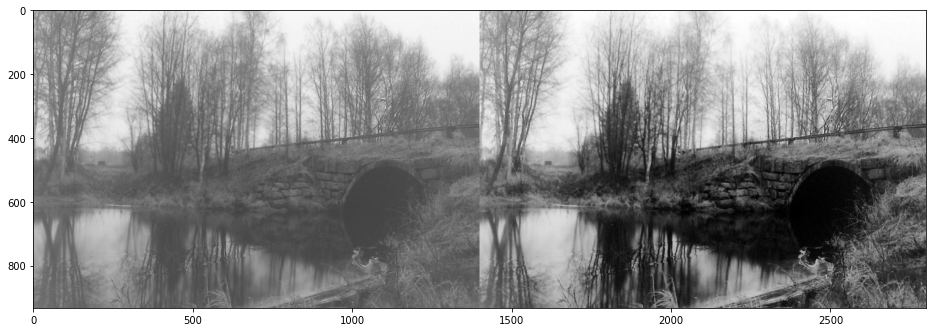

In [ ]:
img = cv2.imread('/content/River.jpg', 0)

### YOUR CODE ###
# START
equ = cv2.equalizeHist(img)
# END

res = np.hstack((img, equ)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

## Part 2

### CLAHE OpenCV Library

In [ ]:
def CLAHE(image, gridSize, clip_limit):
    '''
    inputs:
    image (ndarray): input image
    gridSize (tuple): window size
    clip_limit (int): threshold for contrast limiting
    output:
    output_image (ndarray): improved image
    '''

    ############
    # Your code
    # Start
    
    # End

    return output_image

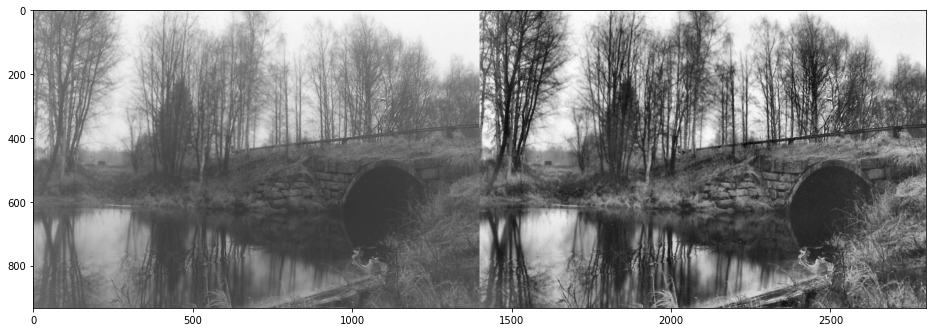

In [ ]:
img = cv2.imread('/content/sample_data/River.jpeg', 0)

# link to its api : https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html 
# reference to it in you document .

### YOUR CODE ###
# START
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# what is clipLimit and tileGridSize ??
clh = clahe.apply(img)
# END

res = np.hstack((img, clh)) #stacking images side-by-side

plt.figure(figsize=(16, 16))
plt.imshow(res, cmap='gray')

## Part 3
Repeat for City image

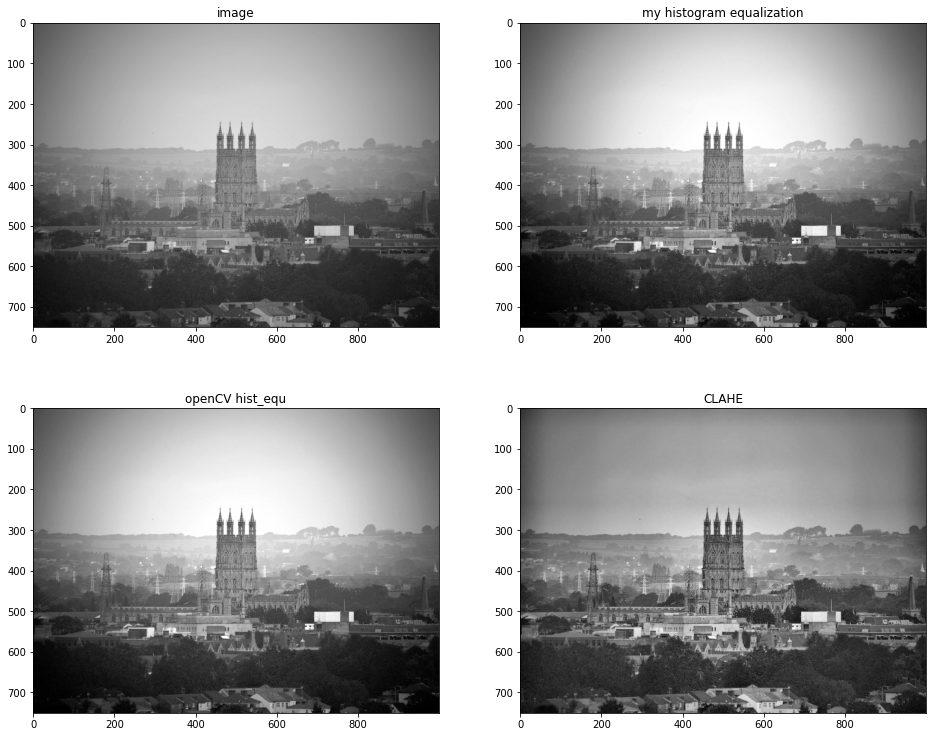

In [76]:
img = cv2.imread('/content/City.jpg', 0)

# my method
my_equ = hist_equ(img)

# equalHist
equ = cv2.equalizeHist(img)

# CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clh = clahe.apply(img)

# showing side-by-side
# add title for this 
# res = np.hstack((img,my_equ , equ, clh))
# plt.figure(figsize=(16, 16))
# plt.imshow(res, cmap='gray')

f, axarr = plt.subplots(2,2,figsize=(16, 13))

axarr[0,0].imshow(img, cmap='gray')
axarr[0,0].title.set_text('image')

axarr[0,1].imshow(my_equ, cmap='gray')
axarr[0,1].title.set_text('my histogram equalization')

axarr[1,0].imshow(equ, cmap='gray')
axarr[1,0].title.set_text('openCV hist_equ')

axarr[1,1].imshow(clh, cmap='gray')
axarr[1,1].title.set_text('CLAHE')
